Uma fintech de Crédito iniciou sua operação de concessão de empréstimo pessoal e acompanhou a performance de pagamento de 1.000 clientes após 1 ano. Com base dessa amostra, pediu para a área de Análise de Dados verificar quais os fatores de risco dos clientes de forma a conseguir aprovar mais contratos com a menor inadimplência possível.
Com base nessas informações, pede-se:

Quais fatores de risco estão mais associados a inadimplência? Com isso, o que a fintech deveria mudar de forma a minimizar a inadimplência?
Crie uma forma de atribuir a probabilidade de inadimplência para cada cliente da base usando os fatores de risco identificados.
Discuta um corte nessa probabilidade de forma a aprovar clientes apenas acima do corte. Se isso acontecer, qual a probabilidade de inadimplência esperada e qual a proporção de clientes aprovados esperada?

In [3]:
import pandas as pd
import numpy as np
#import ydata_profiling

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
#from dtreeviz.trees import dtreeviz
#!pip install --upgrade dtreeviz
#import plotnine as p9

# Pacotes de modelagem
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Módulo de Análise Exploratória
import aed


SystemError: initialization of _internal failed without raising an exception

In [2]:
#Leitura de dados
df = pd.read_excel("Base_Inadimplencia.xlsx", sheet_name=1)

### Ajuste do banco de dados

In [4]:
#df.dtypes
#df.columns
#df.isnull().sum()
#df.index.duplicated().sum()
#df.info()

Idade                    int64
Sexo                    object
Escolaridade            object
Tipo_Moradia            object
Saldo_Investimento      object
Saldo_Conta_Corrente    object
Valor_Emprestimo         int64
Duracao_Emprestimo       int64
Inadimplencia            int64
dtype: object

### Analise exploratoria

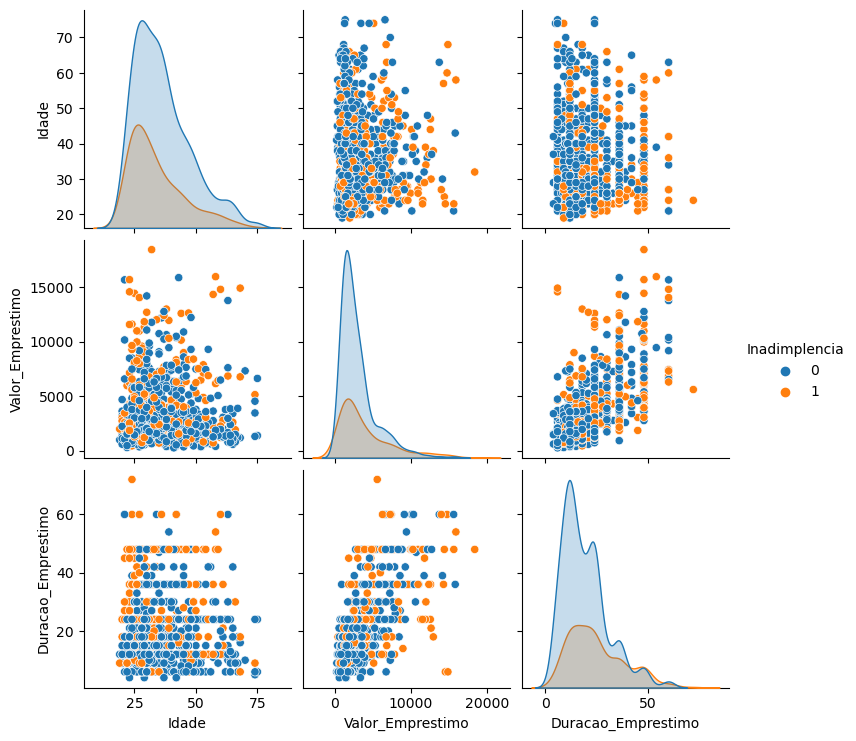

In [17]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, hue='Inadimplencia');

In [3]:
# Analise IV

df_iv = aed.analise_iv(df, 
                          'Inadimplencia')
df_iv.get_lista_iv()

C:\Users\tania\Desktop\Preditiva\Estudos de caso\Inadimplencia\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


Inadimplencia,IV
Variavel,
Saldo_Conta_Corrente,0.73
Duracao_Emprestimo,0.25
Saldo_Investimento,0.20
Valor_Emprestimo,0.11
Idade,0.09
Tipo_Moradia,0.09
Sexo,0.03
Escolaridade,0.01


In [4]:
df_iv.get_bivariada(var_escolhida='Saldo_Conta_Corrente')

==> "Saldo_Conta_Corrente" tem IV de 0.73


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Saldo_Conta_Corrente,Alto,21,87,108,10.8,7.00,12.43,19.44,0.56,-0.58,0.03
1,Saldo_Conta_Corrente,Moderado,98,126,224,22.4,32.67,18.00,43.75,1.82,0.60,0.09
2,Saldo_Conta_Corrente,Pouco,135,139,274,27.4,45.00,19.86,49.27,2.27,0.82,0.21
3,Saldo_Conta_Corrente,Sem conta,46,348,394,39.4,15.33,49.71,11.68,0.31,-1.17,0.40


In [5]:
df_iv.get_bivariada(var_escolhida='Duracao_Emprestimo')

==> "Duracao_Emprestimo" tem IV de 0.25


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Duracao_Emprestimo,"(3.99, 9.0]",24,119,143,14.3,8.00,17.00,16.78,0.47,-0.76,0.07
1,Duracao_Emprestimo,"(9.0, 12.0]",52,164,216,21.6,17.33,23.43,24.07,0.74,-0.30,0.02
2,Duracao_Emprestimo,"(12.0, 15.0]",13,59,72,7.2,4.33,8.43,18.06,0.51,-0.67,0.03
3,Duracao_Emprestimo,"(15.0, 18.0]",43,72,115,11.5,14.33,10.29,37.39,1.39,0.33,0.01
4,Duracao_Emprestimo,"(18.0, 24.0]",66,158,224,22.4,22.00,22.57,29.46,0.97,-0.03,0.00
5,Duracao_Emprestimo,"(24.0, 30.0]",19,38,57,5.7,6.33,5.43,33.33,1.17,0.16,0.00
6,Duracao_Emprestimo,"(30.0, 36.0]",38,48,86,8.6,12.67,6.86,44.19,1.85,0.62,0.04
7,Duracao_Emprestimo,"(36.0, 72.0]",45,42,87,8.7,15.00,6.00,51.72,2.50,0.92,0.08


### Criação do modelo de Arvore de decisão

In [6]:
# Criação das variáveis dummies
df_modelo = pd.get_dummies(df)
df_modelo.head()

,Idade,Valor_Emprestimo,Duracao_Emprestimo,Inadimplencia,Sexo_H,Sexo_M,Escolaridade_Ensino Medio,Escolaridade_Graduacao,Escolaridade_Pos Graduacao,Tipo_Moradia_Alugada,Tipo_Moradia_De favor,Tipo_Moradia_Propria,Saldo_Investimento_Alto,Saldo_Investimento_Moderado,Saldo_Investimento_Pouco,Saldo_Investimento_Sem investimento,Saldo_Conta_Corrente_Alto,Saldo_Conta_Corrente_Moderado,Saldo_Conta_Corrente_Pouco,Saldo_Conta_Corrente_Sem conta
0,67,1169,6,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,22,5951,48,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,49,2096,12,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,45,7882,42,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,53,4870,24,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [7]:
# Target (variável resposta)
y = df_modelo['Inadimplencia']

# Features (variáveis explicativas)
x = df_modelo.drop(['Inadimplencia'], 
                      axis = 1)

In [8]:
modelo_Inadimplencia = DecisionTreeClassifier(max_depth=3, 
                                         random_state=42)
modelo_Inadimplencia.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

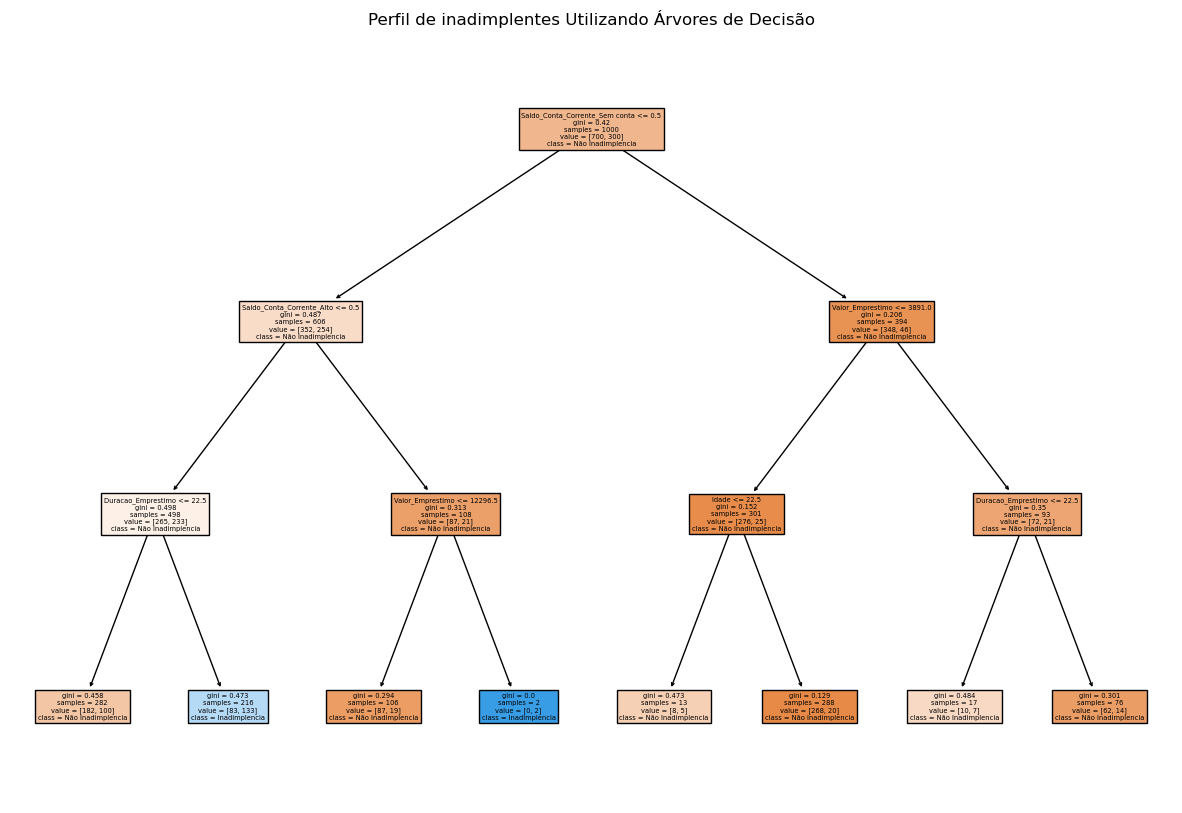

In [11]:

sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_Inadimplencia,
               feature_names=features, 
               class_names=['Não Inadimplencia','Inadimplencia'],
               filled=True);
plt.title("Perfil de inadimplentes Utilizando Árvores de Decisão");

In [13]:
iz = dtreeviz(tree_model=modelo_Inadimplencia,
               x_data=x, y_data=y, 
               target_name='Target',
               feature_names=features,
               class_names=['Não Inadimplencia', 'Inadimplencia'], 
               scale=2.0)
viz

NameError: name 'dtreeviz' is not defined

In [12]:
# Cálculo do desempenho do modelo: Acurácia
round(accuracy_score(y, modelo_Inadimplencia.predict(x)),2)

0.75